# K-Nearest Neighbors (KNN)
El algoritmo K-Nearest Neighbors (KNN) es un método de clasificación supervisada utilizado para clasificar puntos de datos basados en la proximidad a otros puntos de datos en el espacio de características. El principio fundamental detrás de KNN es que los puntos que son similares estarán cerca unos de otros.

<img src="../imgs/knn_gif.gif" style="max-width: 60%;">

El algoritmo KNN no tiene un proceso de entrenamiento explícito. En cambio, almacena todos los datos de entrenamiento y los utiliza durante la fase de predicción.
Para predecir la clase de un nuevo punto de datos, el algoritmo calcula la distancia entre el nuevo punto y todos los puntos de datos de entrenamiento.
Selecciona los 𝑘 puntos de datos más cercanos (vecinos) al nuevo punto.
Asigna la clase más común entre estos 𝑘 vecinos al nuevo punto de datos.

<img src="../imgs/knn_selector.webp">

La distancia comúnmente utilizada en KNN es la distancia euclidiana, aunque se pueden usar otras medidas de distancia.

<img src="../imgs/distances.jpg">


### Lectura de datos

In [15]:
import pandas as pd

# Reconstruimos los conjuntos de datos
df_p = pd.read_csv("../data/iris_p.csv")
df_s = pd.read_csv("../data/iris_s.csv")
df_v = pd.read_csv("../data/iris_v.csv")

In [16]:
df_p.head()

,petal length (cm),petal width (cm),flower id
0,1.4,0.2,1
1,1.4,0.2,2
2,1.3,0.2,3
3,1.5,0.2,4
4,1.4,0.2,5


In [17]:
df_s.head()

,sepal length (cm),sepal width (cm),flower id
0,5.1,3.5,1
1,4.9,3.0,2
2,4.7,3.2,3
3,4.6,3.1,4
4,5.0,3.6,5


In [18]:
df_v.head()

,species,flower id
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


In [19]:
# Usamos join para unir los conjuntos de datos
df = df_p.join(df_s.set_index("flower id"), on="flower id")
print(df.head())

df = df.join(df_v.set_index("flower id"), on="flower id")
df.head()

   petal length (cm)  petal width (cm)  flower id  sepal length (cm)  \
0                1.4               0.2          1                5.1   
1                1.4               0.2          2                4.9   
2                1.3               0.2          3                4.7   
3                1.5               0.2          4                4.6   
4                1.4               0.2          5                5.0   

   sepal width (cm)  
0               3.5  
1               3.0  
2               3.2  
3               3.1  
4               3.6  


,petal length (cm),petal width (cm),flower id,sepal length (cm),sepal width (cm),species
0,1.4,0.2,1,5.1,3.5,0
1,1.4,0.2,2,4.9,3.0,0
2,1.3,0.2,3,4.7,3.2,0
3,1.5,0.2,4,4.6,3.1,0
4,1.4,0.2,5,5.0,3.6,0


In [20]:
df = df.drop("flower id", axis=1)

### Modelo

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

# Cargar el conjunto de datos
iris = load_iris()
# Convert to DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# Agregar la columna de especies
df['species'] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
df.shape

(150, 5)

In [23]:
df["species"].unique()

array([0, 1, 2])

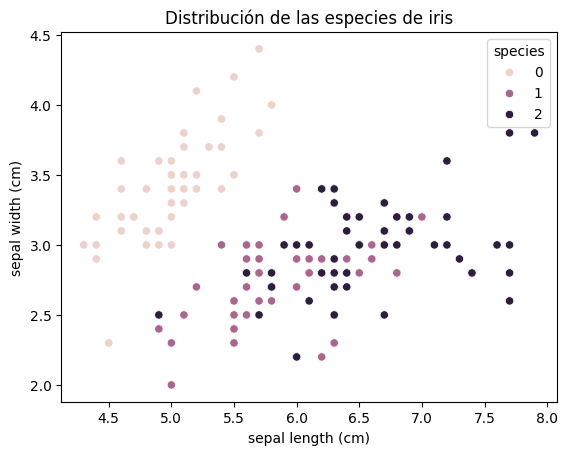

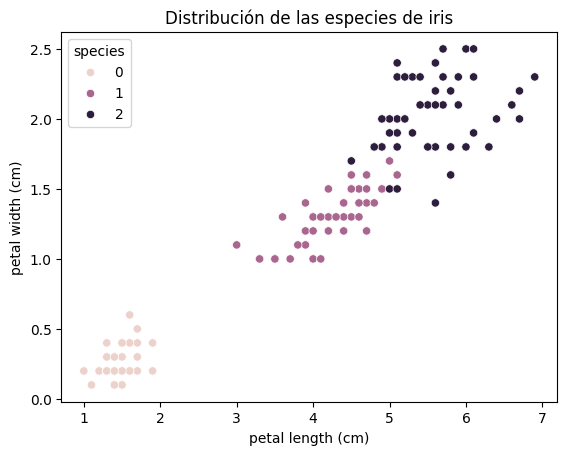

In [24]:
# Hacemos un par de gráficos para visualizar los resultados
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de dispersión de las características sepal_length y sepal_width
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='species', data=df)
plt.title('Distribución de las especies de iris')
plt.show()

# Gráfico de dispersión de las características petal_length y petal_width
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='species', data=df)
plt.title('Distribución de las especies de iris')
plt.show()

In [25]:
X = df[["petal length (cm)", "petal width (cm)"]]  # Usamos solo las dos primeras características
y = df['species']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Crear y entrenar el modelo KNN
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Hacer predicciones
y_pred = knn.predict(X_test)

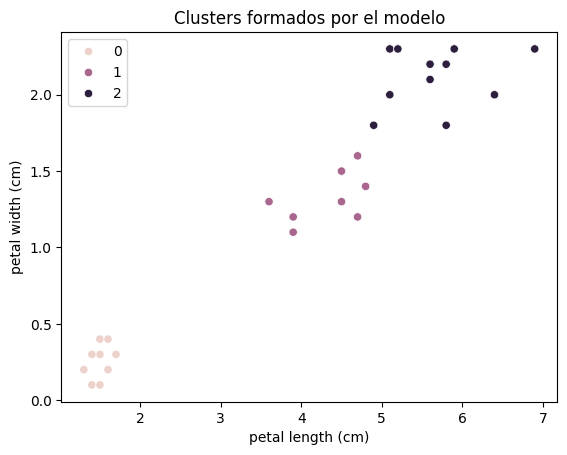

In [28]:
# Visualizamos los clusters formados por el modelo (predicciones)
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue=y_pred, data=X_test)
plt.title('Clusters formados por el modelo')
plt.show()

Set de train

Accuracy: 0.9833333333333333
Precision: 0.9833333333333333
Recall: 0.9833333333333333
F1: 0.9833333333333333


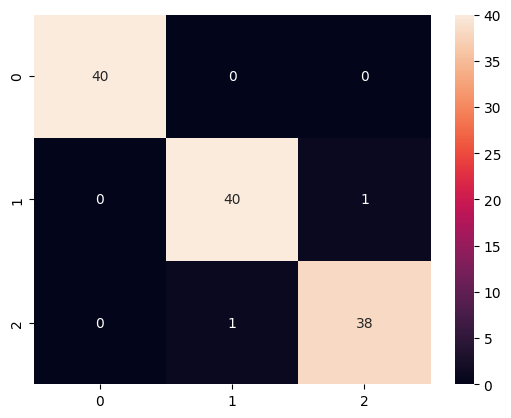

In [29]:
y_train_pred = knn.predict(X_train)

# verificamos las métricas de evaluación
print('Accuracy:', accuracy_score(y_train, y_train_pred))
print('Precision:', precision_score(y_train, y_train_pred, average='micro'))
print('Recall:', recall_score(y_train, y_train_pred, average='micro'))
print('F1:', f1_score(y_train, y_train_pred, average='micro'))

# Matriz de confusión
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d');

Set de test

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


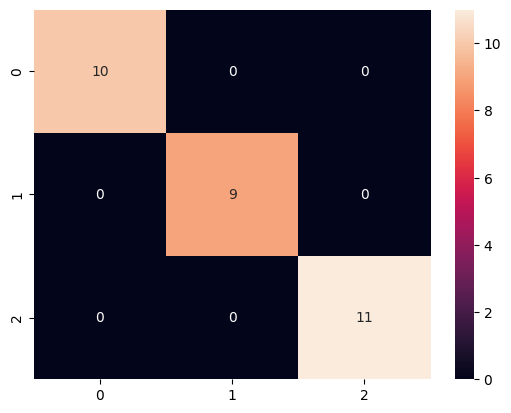

In [30]:
# verificamos las métricas de evaluación
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1:', f1_score(y_test, y_pred, average='weighted'))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d');

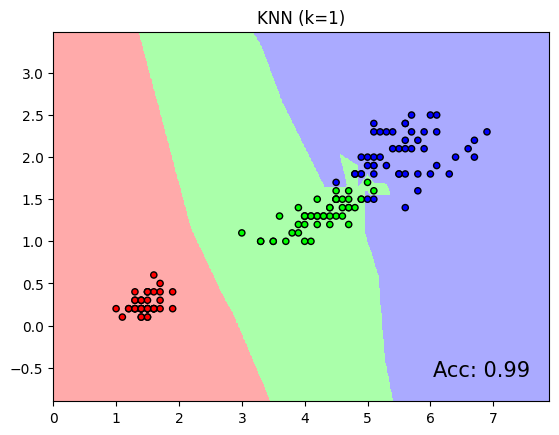

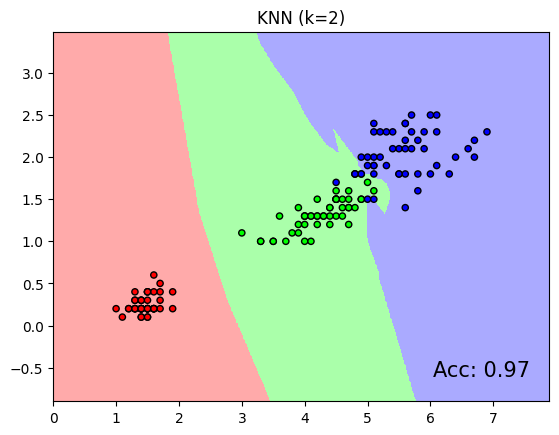

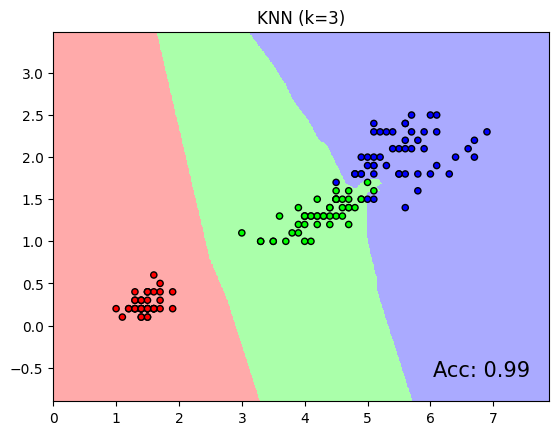

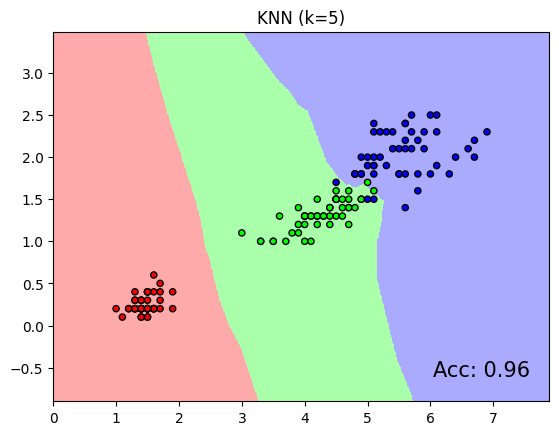

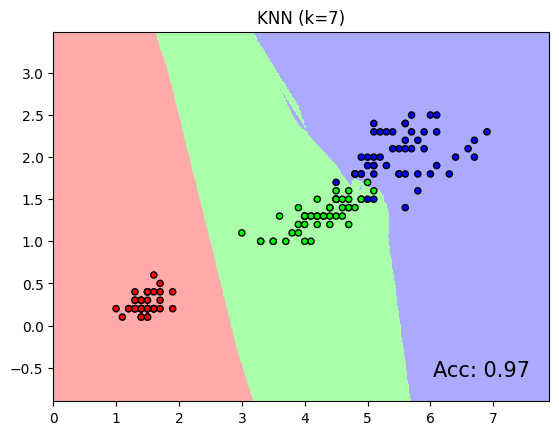

In [31]:
import numpy as np
from matplotlib.colors import ListedColormap

X = df[["petal length (cm)", "petal width (cm)"]].values
y = df['species'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear una función para graficar los límites de decisión
def plot_decision_boundaries(X, y, n_neighbors):
    h = .01  # paso de la malla en la gráfica

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    for n in n_neighbors:
        # Crear una instancia de KNN y ajustar los datos
        clf = KNeighborsClassifier(n, weights='uniform')
        clf.fit(X_train, y_train)

        # Crear malla de puntos para graficar
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.figure()
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

        # Graficar también los puntos de entrenamiento
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title(f"KNN (k={n})")

        # Verificamos las métricas de evaluación
        y_pred = clf.predict(X)
        acc = accuracy_score(y, y_pred)
        plt.text(xx.max() - .3, yy.min() + .3, ('Acc: %.2f' % acc).lstrip('0'),
                 size=15, horizontalalignment='right')

# Veamos los límites de decisión para k=1, 2, 3, 5 y 7
plot_decision_boundaries(X, y, [1, 2, 3, 5, 7])
plt.show()

Ocupamos otras características

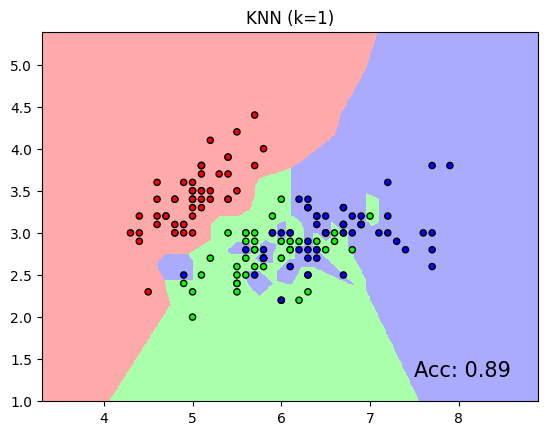

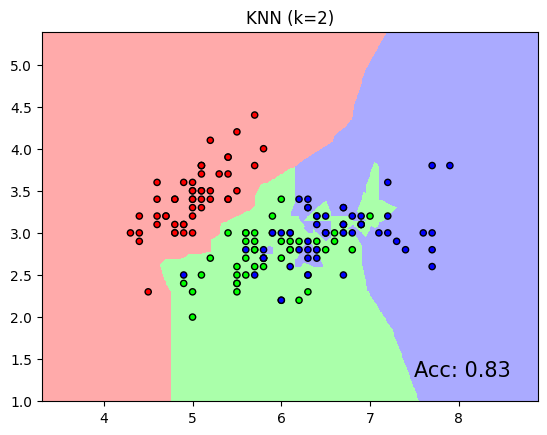

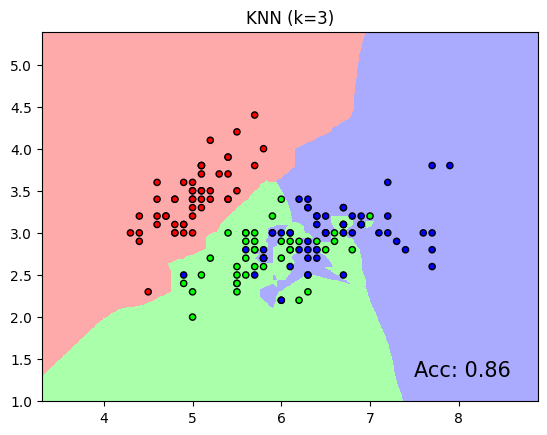

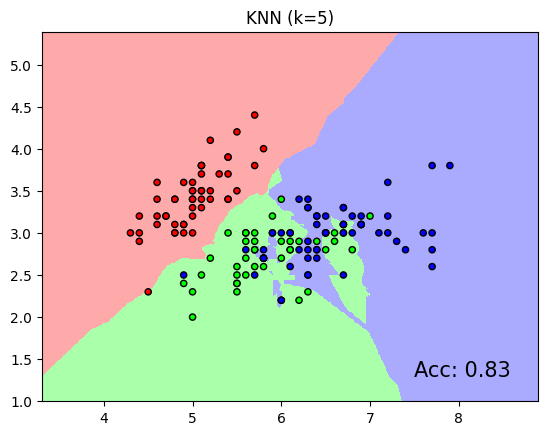

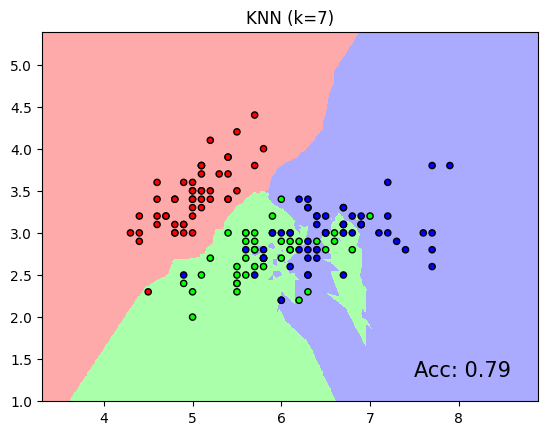

In [32]:
import numpy as np
from matplotlib.colors import ListedColormap

X = df[["sepal length (cm)", "sepal width (cm)"]].values
y = df['species'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear una función para graficar los límites de decisión
def plot_decision_boundaries(X, y, n_neighbors):
    h = .01  # paso de la malla en la gráfica

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    for n in n_neighbors:
        # Crear una instancia de KNN y ajustar los datos
        clf = KNeighborsClassifier(n, weights='uniform')
        clf.fit(X_train, y_train)

        # Crear malla de puntos para graficar
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.figure()
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

        # Graficar también los puntos de entrenamiento
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title(f"KNN (k={n})")

        # Verificamos las métricas de evaluación
        y_pred = clf.predict(X)
        acc = accuracy_score(y, y_pred)
        plt.text(xx.max() - .3, yy.min() + .3, ('Acc: %.2f' % acc).lstrip('0'),
                 size=15, horizontalalignment='right')

# Veamos los límites de decisión para k=1, 2, 3, 5 y 7
plot_decision_boundaries(X, y, [1, 2, 3, 5, 7])
plt.show()

Ocupamos todas las características

Train
Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1: 0.95


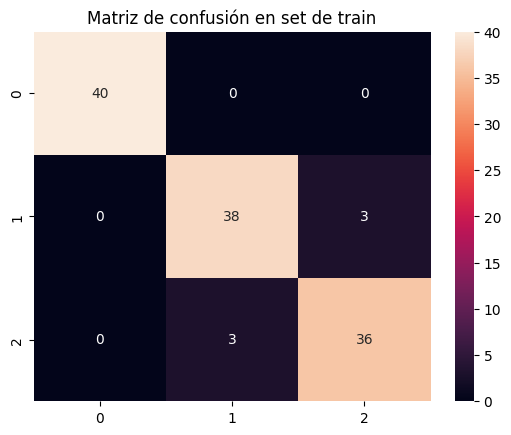

Test
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


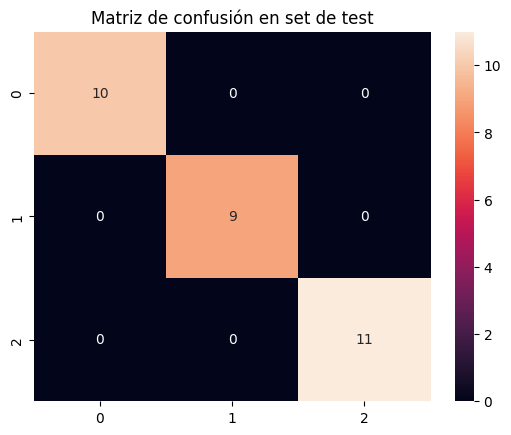

In [33]:
X = df.drop('species', axis=1)
y = df['species']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo KNN
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train, y_train)

# Hacer predicciones
y_pred = knn.predict(X_test)

# Predecir en set de train
y_train_pred = knn.predict(X_train)

# Métricas en set de train
print("Train")
print('Accuracy:', accuracy_score(y_train, y_train_pred))
print('Precision:', precision_score(y_train, y_train_pred, average='micro'))
print('Recall:', recall_score(y_train, y_train_pred, average='micro'))
print('F1:', f1_score(y_train, y_train_pred, average='micro'))

# Matriz de confusión
plt.figure()
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d');
plt.title('Matriz de confusión en set de train')
plt.show()


# Métricas en set de test
print("Test")
# Verificamos las métricas de evaluación
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1:', f1_score(y_test, y_pred, average='weighted'))

# Matriz de confusión
plt.figure()
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d');
plt.title('Matriz de confusión en set de test')
plt.show()

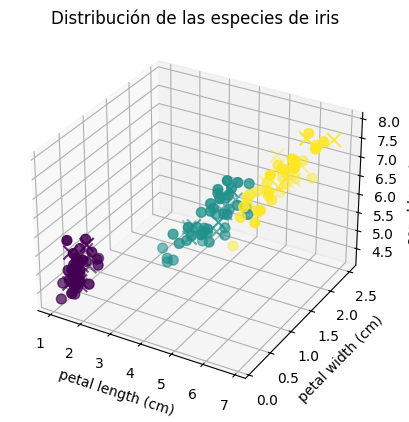

In [34]:
# Graficar en 3D petal_length, petal_width y sepal_length
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos de entrenamiento
ax.scatter(X_train['petal length (cm)'], X_train['petal width (cm)'], X_train['sepal length (cm)'], c=y_train, cmap='viridis', s=50)

# Graficar los puntos de test
ax.scatter(X_test['petal length (cm)'], X_test['petal width (cm)'], X_test['sepal length (cm)'], c=y_test, cmap='viridis', s=100, marker='x')

ax.set_xlabel('petal length (cm)')
ax.set_ylabel('petal width (cm)')
ax.set_zlabel('sepal length (cm)')
plt.title('Distribución de las especies de iris')
plt.show()

In [37]:
import pandas as pd

# Cargamos los datos
data = pd.read_csv("../data/heart_failure.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [38]:
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train
Accuracy: 0.96875
Precision: 0.96875
Recall: 0.96875
F1: 0.96875


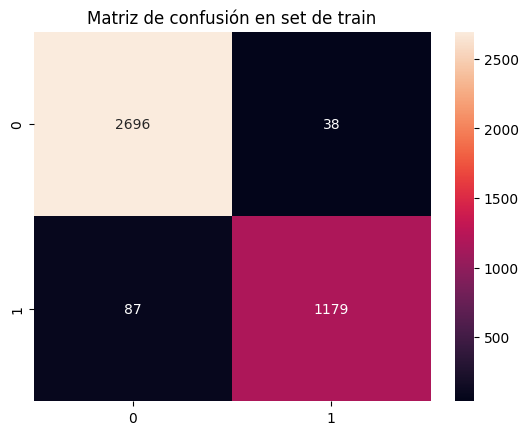

Test
Accuracy: 0.941
Precision: 0.9406648966213051
Recall: 0.941
F1: 0.9407427494841353


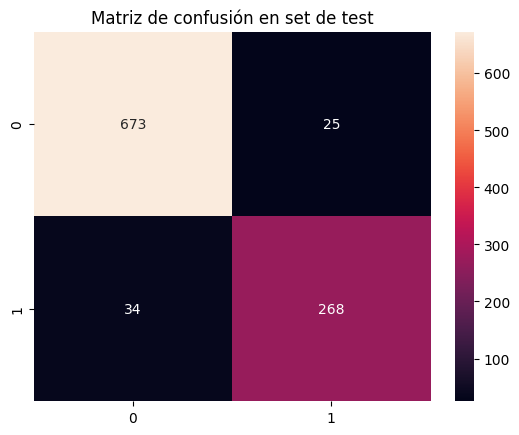

In [39]:
# Crear y entrenar el modelo KNN
k = 4
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train, y_train)

# Hacer predicciones
y_pred = knn.predict(X_test)

# Predecir en set de train
y_train_pred = knn.predict(X_train)

# Métricas en set de train
print("Train")
print('Accuracy:', accuracy_score(y_train, y_train_pred))
print('Precision:', precision_score(y_train, y_train_pred, average='micro'))
print('Recall:', recall_score(y_train, y_train_pred, average='micro'))
print('F1:', f1_score(y_train, y_train_pred, average='micro'))

# Matriz de confusión
plt.figure()
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d');
plt.title('Matriz de confusión en set de train')
plt.show()


# Métricas en set de test
print("Test")
# Verificamos las métricas de evaluación
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1:', f1_score(y_test, y_pred, average='weighted'))

# Matriz de confusión
plt.figure()
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d');
plt.title('Matriz de confusión en set de test')
plt.show()

In [40]:
# Importamos para entrenar arboles de decisión
from sklearn.tree import DecisionTreeClassifier

# Creamos y entrenamos el modelo
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

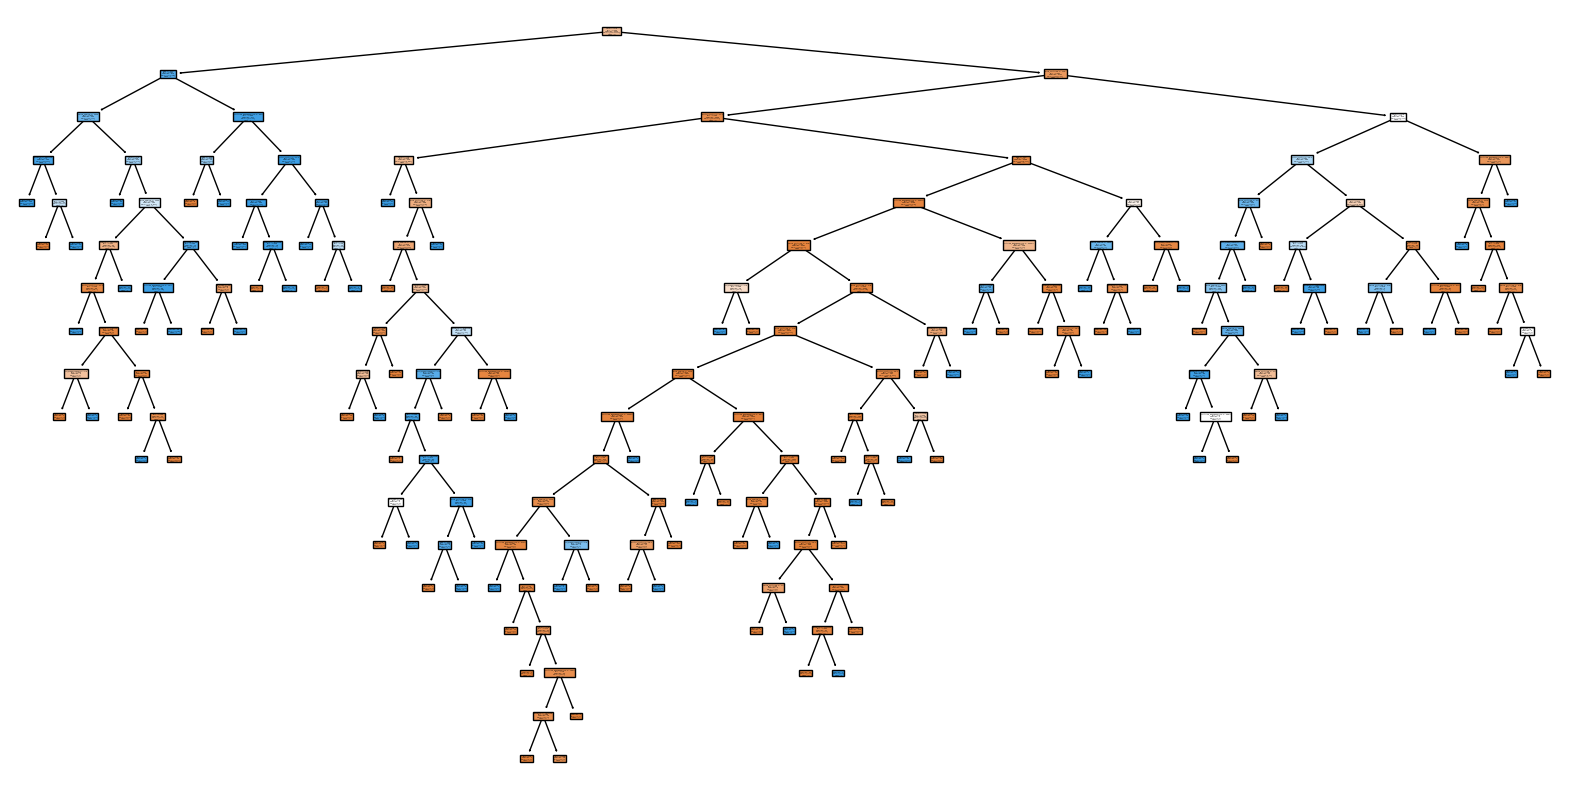

In [43]:
# Graficamos las preguntas y respuestas del arbol
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=['0', '1'])
# Guardar gráfica en archivo con 600dpi
plt.savefig('tree.png', dpi=600)

In [42]:
#Imprimir hoja por hoja las decisiones del arbol
from sklearn.tree import export_text

tree_rules = export_text(tree, feature_names=list(X.columns))
print(tree_rules)

|--- time <= 67.50
|   |--- age <= 61.00
|   |   |--- serum_sodium <= 136.50
|   |   |   |--- platelets <= 339000.00
|   |   |   |   |--- class: 1
|   |   |   |--- platelets >  339000.00
|   |   |   |   |--- smoking <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- smoking >  0.50
|   |   |   |   |   |--- class: 1
|   |   |--- serum_sodium >  136.50
|   |   |   |--- time <= 11.50
|   |   |   |   |--- class: 1
|   |   |   |--- time >  11.50
|   |   |   |   |--- serum_sodium <= 138.50
|   |   |   |   |   |--- platelets <= 439000.00
|   |   |   |   |   |   |--- ejection_fraction <= 27.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- ejection_fraction >  27.50
|   |   |   |   |   |   |   |--- platelets <= 213500.00
|   |   |   |   |   |   |   |   |--- high_blood_pressure <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- high_blood_pressure >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |  

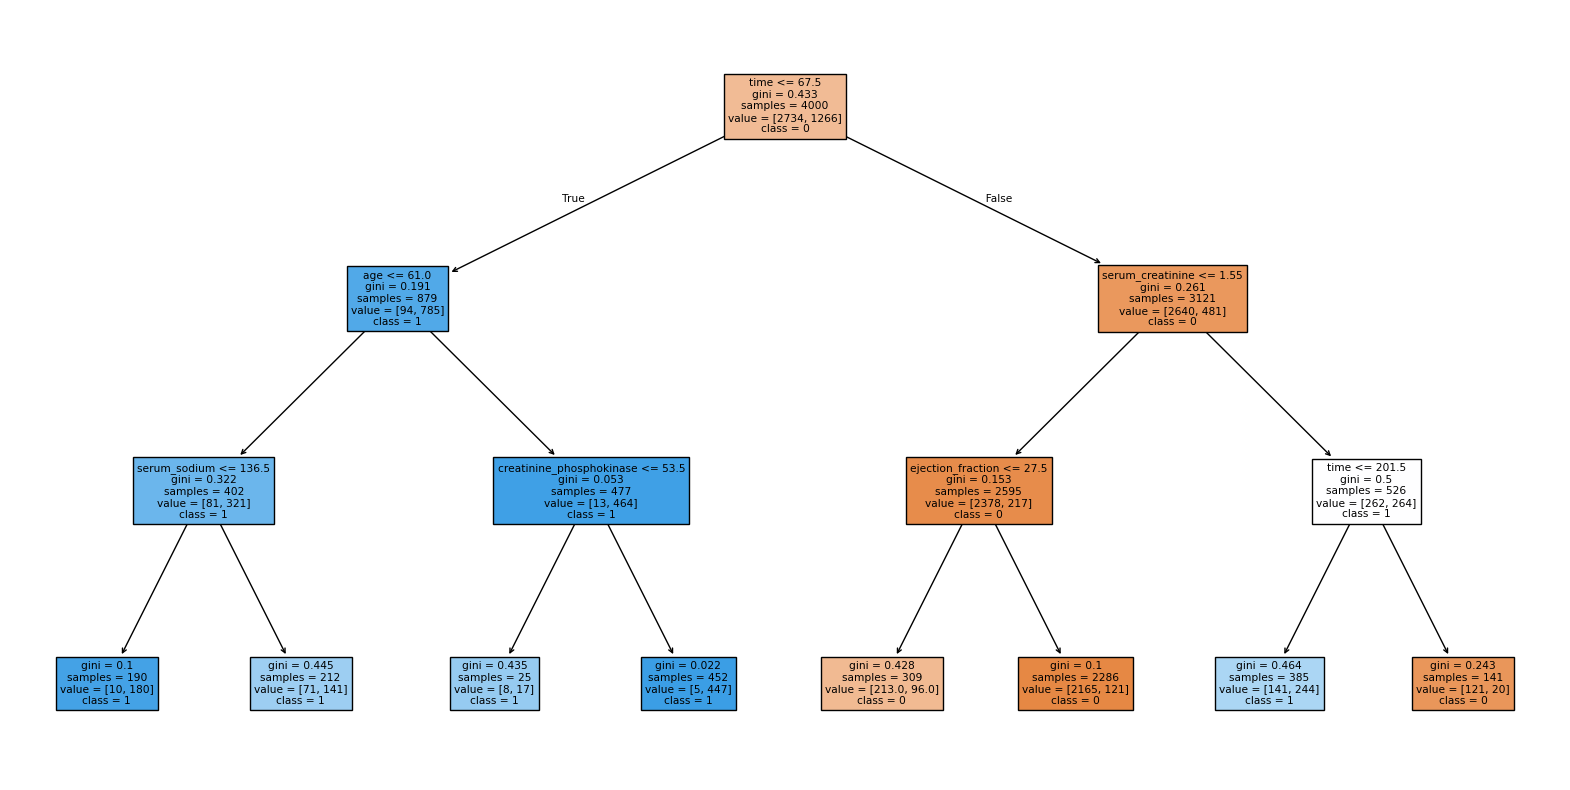

In [44]:
# Entrenamos otro modelo con menos profundidad
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

# Graficamos las preguntas y respuestas del arbol
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=['0', '1'])
plt.show()

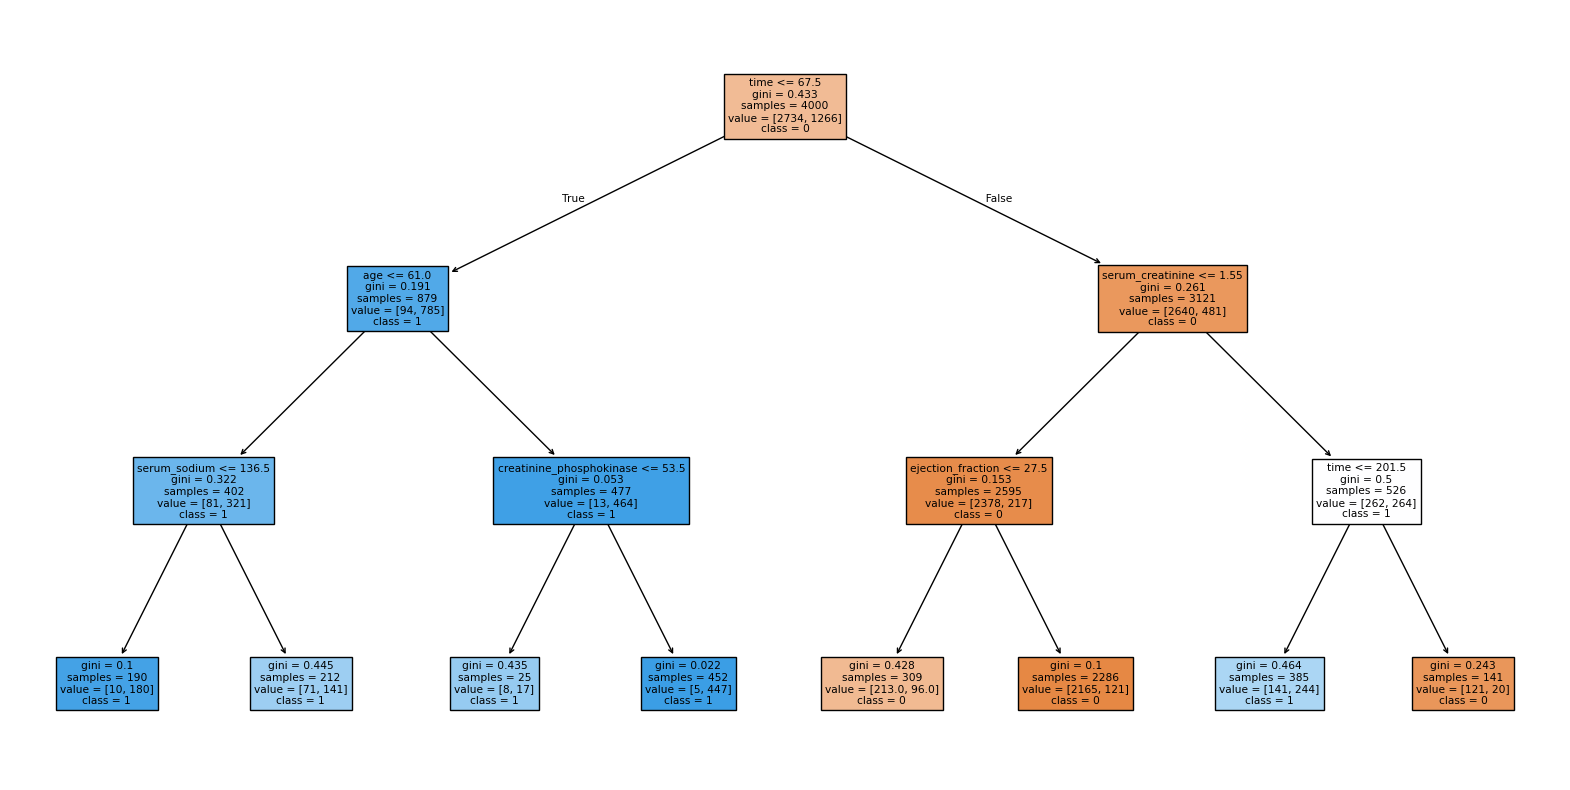

In [45]:
# Entrenamos otro modelo con menos profundidad
tree = DecisionTreeClassifier(max_depth=3, random_state=1234)
tree.fit(X_train, y_train)

# Graficamos las preguntas y respuestas del arbol
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=['0', '1'])
plt.show()

## TODO

Buscar los mejores parámetros para entrenar el modelo haciendo uso del GridSearchCV